### RAG 기반 고객사 자체 문서에 대한 커스텀 검색 엔진 제작

In [1]:
!pip install llama-index
!pip install openai
!pip install docx2txt
!pip install torch transformers python-pptx Pillow
!pip install chromadb
!pip install llama-index-retrievers-bm25

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 743.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3960 sha256=014d934815dd6befb7fab06e2eb3394187ddc2d7394327562e68f7de4cbcaf54
 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. llama-index 사용해보기
LlamaIndex는 컨텍스트 증강의 이점을 누릴 수 있는 LLM 기반 애플리케이션을 위한 데이터 프레임워크입니다. 이러한 LLM 시스템은 "검색 증강 세대"의 약자인 RAG 시스템이라고 불립니다. LlamaIndex는 개인 또는 도메인별 데이터를 보다 쉽게 수집, 구조화 및 액세스할 수 있는 필수 추상화를 제공하여 이러한 데이터를 LLM에 안전하고 안정적으로 주입하여 보다 정확한 텍스트를 생성할 수 있도록 합니다.

1-1 LLM 사용하기

In [3]:
import os
from llama_index.llms.openai import OpenAI

os.environ['OPENAI_API_KEY'] = 'sk-'

response = OpenAI().complete("패스트캠퍼스는 어떤 회사인가요?")
print(response)

패스트캠퍼스는 온라인 교육 플랫폼으로서 다양한 분야의 온라인 강의를 제공하는 회사입니다. 프로그래밍, 마케팅, 디자인, 비즈니스, 데이터 분석 등 다양한 분야의 강의를 수강할 수 있으며, 전문 강사진들이 직접 강의를 진행하고 있습니다. 또한, 실무 경험이 풍부한 전문가들과의 오프라인 강의나 워크숍도 진행하고 있어 학생들이 실무에서 필요한 역량을 키울 수 있도록 도와주고 있습니다.


In [4]:
from llama_index.llms.openai import OpenAI
from llama_index.core import Settings
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

## settings 에 llm을 등록하여 llama index의 다른 기능들에서 llm을 사용할 수 있다
Settings.llm = OpenAI(temperature=0.3, model="gpt-3.5-turbo")

folder_path = '/content/drive/MyDrive/데이터/docs'
documents = SimpleDirectoryReader(folder_path).load_data()
index = VectorStoreIndex.from_documents(
    documents,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


1-2 Retreiver 사용해보기

In [ ]:
from llama_index.retrievers.bm25 import BM25Retriever

vector_retriever = index.as_retriever(similarity_top_k=2)


In [ ]:
docs = await vector_retriever.aretrieve("패스트캠퍼스는 어떤 회사인가요?")
for doc in docs:
  print(f"Score: {doc.get_score()}")
  print(doc.get_content())
  print("\n\n")


Score: 0.8491226409635726
패스트캠퍼스 이용약관
1.1 **패스트캠퍼스 (이하'회사')**는온라인교육분야에서 선두주자로자리매김하고 있는플랫폼입니다 . 우리회사는다양
한컴퓨터및IT 분야의강의를제공하여 학습자들이 전문기술역량을향상시키고 , 미래산업의요구에발맞춰경쟁력을
갖출수있도록지원하고 있습니다 .
1.2 우리회사의강의는최신기술동향과실무경험을반영하여 구성되어 있습니다 . 따라서회원들은 이론적인 내용뿐만
아니라현업에서 실제로활용되는 기술과도구들을 배울수있습니다 . 이는학습자들이 실무에서 빠르게적응하고 성과를
내기위한효율적인 방법입니다 .
1.3 뿐만아니라 , 우리회사는강의진행에참여하는 전문가들을 선발하여 강의의품질을높이고있습니다 . 이는
학습자들이 최상의교육을받을수있도록보장하는 한편, 실무에서 요구되는 역량을효과적으로 습득할수있도록돕는
역할을합니다 .
1.5 이모든노력의목적은학습자들이 전문가로 성장하고 , 현업에서 뛰어난성과를이룰수있도록지원하는 것에있습니
다. 우리회사는학습자들의 성공을함께이루어나가고자 최선을다하고있습니다 . 함께해요 , 패스트캠퍼스와 함께라면 여
러분의성공은눈앞에있습니다 .회사소개
1.4 더불어우리회사는학습자들의 다양한학습요구에부응하기 위해다양한강의형식과수준을제공하고 있습니다 . 초
급부터고급수준까지 다양한강의가준비되어 있으며 , 학습자들은 자신에게 맞는강의를선택하여 학습할수있습니다 .



Score: 0.8220241765305087
패스트캠퍼스 이용약관
회원은회사의웹사이트나 모바일애플리케이션을 통해강의를결제할수있습니다 . 우리는다양한결제수단
을제공하여 회원들이 자유롭게 선택할수있도록합니다 . 신용카드 , 직불카드 , 전자결제 등다양한옵션을통
해강의를구매할수있습니다 .01
강의를결제한후, 회원은결제완료화면에서 강의에대한액세스링크를제공받습니다 . 또한이메일로 결제
내역과함께강의액세스정보를받게됩니다 . 이를통해회원은언제든지 강의에접속하여 학습을시작할수
있습니다 .02
우리의결제시스템은 안전하고 신속합니다 . 회원들의 결제정보는안

1-3 RAG 방식으로 LLM 결과 생성하기

In [8]:
from llama_index.llms.openai import OpenAI
from llama_index.core import Settings
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

Settings.llm = OpenAI(temperature=0.3, model="gpt-3.5-turbo")

folder_path = '/content/drive/MyDrive/데이터/docs'
documents = SimpleDirectoryReader(folder_path).load_data()

## document array로 부터 벡터 스토어 생성하기
index = VectorStoreIndex.from_documents(
    documents,
)

query_engine = index.as_query_engine()
response = query_engine.query("패스트캠퍼스는 어떤 회사인가요?")
print(response)

Fast Campus is a platform that is a leading player in the online education field, providing a variety of computer and IT courses to enhance learners' professional skills and support them in gaining competitiveness in line with the demands of future industries. The courses offered reflect the latest technology trends and practical experiences, allowing members to learn both theoretical content and technologies and tools used in the industry. Additionally, the company selects experts to conduct the courses, ensuring high-quality education and effective acquisition of skills required in practical settings. The company aims to support learners in becoming experts and achieving outstanding results in the industry, offering various course formats and levels to meet diverse learning needs.


In [ ]:
## 벡터 스토어 생성에서 chunking 방법 정해주기
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Settings

text_splitter = SentenceSplitter(chunk_size=1024, chunk_overlap=10)
Settings.text_splitter = text_splitter

In [ ]:
from llama_index.core import VectorStoreIndex, get_response_synthesizer
from llama_index.core.retrievers import VectorIndexRetriever
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core.postprocessor import SimilarityPostprocessor

retriever = VectorIndexRetriever(
    index=index,
    similarity_top_k=10,
)

response_synthesizer = get_response_synthesizer()

query_engine = RetrieverQueryEngine(
    retriever=retriever,
    response_synthesizer=response_synthesizer,
    node_postprocessors=[SimilarityPostprocessor(similarity_cutoff=0.7)],
)

response = query_engine.query("패스트캠퍼스는 어떤 회사인가요?")
print(response)

패스트캠퍼스는 온라인 교육 분야에서 선두주자로 자리매김하고 있는 플랫폼입니다. 회사는 다양한 컴퓨터 및 IT 분야의 강의를 제공하여 학습자들이 전문기술 역량을 향상시키고, 미래 산업의 요구에 발맞춰 경쟁력을 갖출 수 있도록 지원하고 있습니다.


### 2. 금융 데이터
삼성전자 사업보고서를 pdf형태로 다운받고 해당 문서 기반의 답변 생성하기

In [ ]:
from llama_index.llms.openai import OpenAI
from llama_index.core import Settings
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

## settings 에 llm을 등록하여 llama index의 다른 기능들에서 llm을 사용할 수 있다
Settings.llm = OpenAI(temperature=0.3, model="gpt-3.5-turbo")

folder_path = '/content/drive/MyDrive/데이터/docs/사업보고서'
documents = SimpleDirectoryReader(folder_path).load_data()
index = VectorStoreIndex.from_documents(
    documents,
)

In [ ]:
from llama_index.core import VectorStoreIndex, get_response_synthesizer
from llama_index.core.retrievers import VectorIndexRetriever
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core.postprocessor import SimilarityPostprocessor

retriever = VectorIndexRetriever(
    index=index,
    similarity_top_k=10,
)

response_synthesizer = get_response_synthesizer()

query_engine = RetrieverQueryEngine(
    retriever=retriever,
    response_synthesizer=response_synthesizer,
    node_postprocessors=[SimilarityPostprocessor(similarity_cutoff=0.7)],
)

response = query_engine.query("삼성전자의 사업보고서를 요약해 줘")
print(response)

삼성전자는 다양한 사업 분야를 포함한 기업으로, 현재는 DX(Device eXperience), DS(Device Solutions), SDC(삼성디스플레이㈜), Harman International Industries, Inc.으로 사업을 영위하고 있습니다. DX 부문은 TV, 냉장고, 스마트폰, 통신시스템 등을 다루며, DS 부문은 메모리, Foundry, System LSI 사업을 하고 있습니다. 또한, SDC는 디스플레이 패널 사업을, Harman은 전장부품사업 등을 담당하고 있습니다. 회사의 본점은 경기도 수원시에 위치하고 있습니다.


In [ ]:
query_list = ["현재 삼성전자의 최대 주주는 누구인가요?", "삼성전자의 DX부문 매출액은 얼마인가요?"]

for q in query_list:
  print(f"Q: {q}")
  print(f"A: {query_engine.query(q)}")
  print("\n=========================\n")


Q: 현재 삼성전자의 최대 주주는 누구인가요?
A: 삼성전자의 현재 최대 주주는 삼성물산㈜입니다.


Q: 삼성전자의 DX부문 매출액은 얼마인가요?
A: Samsung Electronics' DX division revenue is 169,992,337 million won.




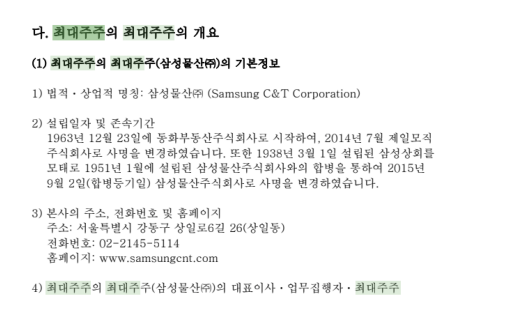

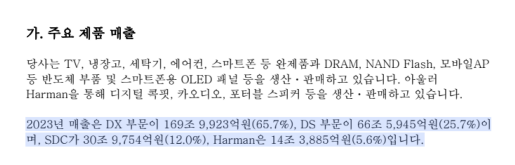

In [ ]:
picture1 = '/content/drive/MyDrive/데이터/docs/최대주주.png'
picture2 = '/content/drive/MyDrive/데이터/docs/주요 제품 매출.png'



from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


img = Image.open(picture1)

plt.imshow(img)
plt.axis('off')
plt.show()


img = Image.open(picture2)

plt.imshow(img)
plt.axis('off')
plt.show()